In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.manifold import TSNE

from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf

In [7]:
HOME_PATH = "../.."
with initialize(config_path="../../Configs"):
    data_path_cfg = compose(config_name="data_path")
data_path_cfg = OmegaConf.create(data_path_cfg)

/home/hoang/anaconda3/envs/k_mnist/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  


### File path

In [5]:
TRAIN_IMGS_PATH = data_path_cfg.k_mnist.train_imgs
TEST_IMGS_PATH = data_path_cfg.k_mnist.test_imgs
TRAIN_LABELS_PATH = data_path_cfg.k_mnist.train_labels
TEST_LABELS_PATH = data_path_cfg.k_mnist.test_labels

In [8]:
train_images = np.load(os.path.join(HOME_PATH, TRAIN_IMGS_PATH))['arr_0']
test_images = np.load(os.path.join(HOME_PATH, TEST_IMGS_PATH))['arr_0']
train_labels = np.load(os.path.join(HOME_PATH, TEST_IMGS_PATH))['arr_0']
test_labels = np.load(os.path.join(HOME_PATH, TEST_LABELS_PATH))['arr_0']

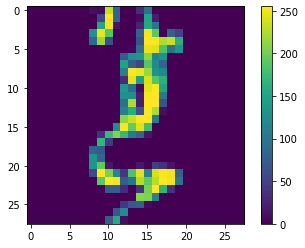

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [10]:
train_images = train_images /255.0
test_images = test_images / 255.0

/home/hoang/anaconda3/envs/k_mnist/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


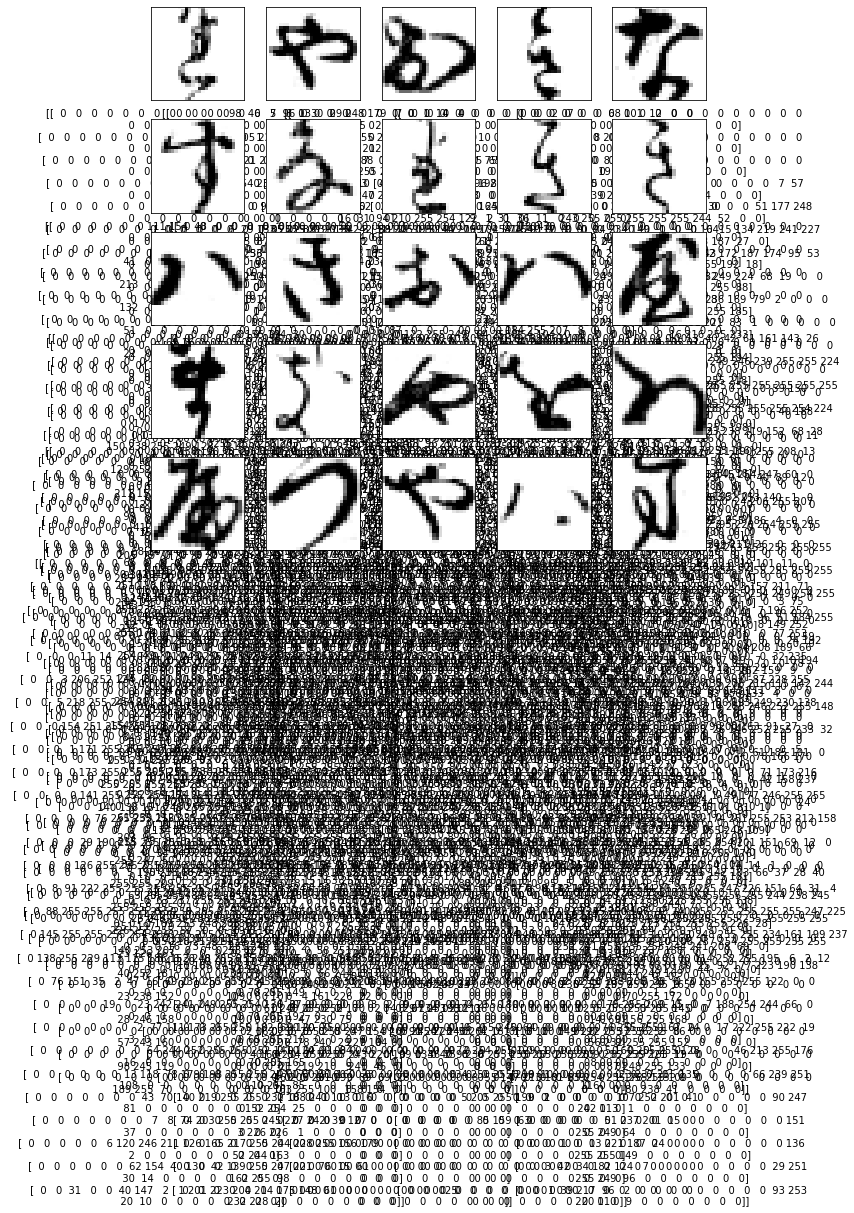

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [ ]:
# Sample from the training set
sample_size = 8000

np.random.seed(2018)
idx = np.random.choice(60000, size=sample_size, replace=False)
train_sample = train_images.reshape(60000, -1)[idx, :]
label_sample = train_labels[idx]

# Generate 2D embedding with TSNE
embeddings = TSNE(verbose=2).fit_transform(train_sample)